# Sentiment Analysis Example
Following [Ryan Rosario's talk](https://vtalks.net/talk/ryan-rosario-sentiment-classification-using-scikit-learn/)


In [62]:
import numpy as np
import pandas as pd
import sklearn.cross_validation
import sklearn.feature_extraction.text
import sklearn.metrics
import sklearn.naive_bayes

names = ['text', 'label']
#read in some text data.
data = pd.read_table("data/AK_quick_data_set.txt", sep=",", names=names)
print("Number of data items = {}".format(data.shape[0]))

Number of data items = 18


In [64]:
# split the data, default is 75% train.
# After the split, we essentially have two arrays of arrays.
train, test = sklearn.cross_validation.train_test_split(data, train_size=0.7)
train_data, test_data = pd.DataFrame(train, columns=names), pd.DataFrame(test, columns=names)
print("Number of training items = {}, Number of testing items = {}".format(train_data.shape[0], test_data.shape[0]))

Number of training items = 12, Number of testing items = 6


In [65]:
# Vectorization is the process of converting all the names into a binary vector of 1s and 0s
# each name is encoded as a set of on/off attributes for each n-gram
vectorizer = sklearn.feature_extraction.text.CountVectorizer(stop_words='english')

In [67]:
"""
# can play with different n-grams and other encodings during vectorization
vectorizer = sklearn.feature_extraction.text.CountVectorizer(
    analyzer='char', ngram_range=(2,3), min_df=0, max_df=0.1, binary=True)
"""

"\n# can play with different n-grams and other encodings during vectorization\nvectorizer = sklearn.feature_extraction.text.CountVectorizer(\n    analyzer='char', ngram_range=(2,3), min_df=0, max_df=0.1, binary=True)\n"

In [69]:
train_matrix = vectorizer.fit_transform(train_data['text'])
test_matrix = vectorizer.transform(test_data['text'])

## if data has 'POS' for possitive label - convert to 1,0 encoding
#positive_cases_train = (train_data['label'] == 'POS')
#positive_cases_test = (train_data['label'] == 'POS')

positive_cases_train = (train_data['label'])
positive_cases_test = (test_data['label'])

In [70]:
# Train the classifier
# watch for class imbalance, this assumes your data is close enough to 50%:50%
classifier = sklearn.naive_bayes.MultinomialNB()
classifier.fit(train_matrix, positive_cases_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
# Predict sentiment for test set
# possible to store the model of the classifier to disk for later use Simple use joblib from scikit-learn
# to pickle it.
predicted_sentiment = classifier.predict(test_matrix)
predicted_probs = classifier.predict_proba(test_matrix)
print("predicted sentiment = {}".format(predicted_sentiment))
print("predicted probabilities = {}".format(predicted_probs))

predicted sentiment = [1 1 1 1 1 1]
predicted probabilities = [[0.19448593 0.80551407]
 [0.41666667 0.58333333]
 [0.45372051 0.54627949]
 [0.41666667 0.58333333]
 [0.41666667 0.58333333]
 [0.41666667 0.58333333]]


In [73]:
#Now, calculate the diagnostics.
accuracy = classifier.score(test_matrix, positive_cases_test)
precision, recall, f1, _ = sklearn.metrics.precision_recall_fscore_support(positive_cases_test, predicted_sentiment)

print("")
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", f1)


Accuracy = 0.6666666666666666
Precision = [0.         0.66666667]
Recall = [0. 1.]
F1 Score = [0.  0.8]


/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Presentation of Diagnostic Plots
Code requires a specific set of data

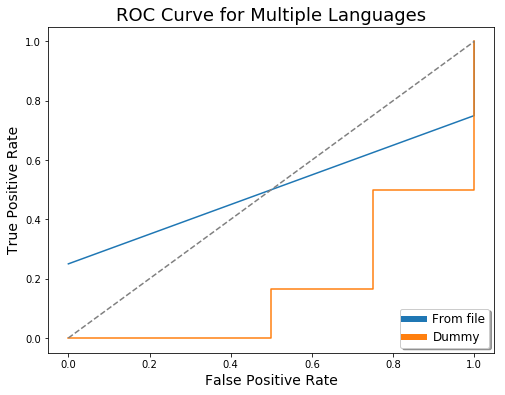

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.cross_validation
import sklearn.feature_extraction.text
import sklearn.metrics
import sklearn.naive_bayes

fig = plt.gcf()
fig.set_size_inches(8,6)

# a dataframe containing language, pedicted probability and true label. - data used for presentation couldn't be shared
#data = pd.read_table("predictions.dat", header=0, sep=',', index_col=False)

# creating my own dummy data
dd_predicted_probs = np.array(np.random.random(10))
dd_positive_cases_train = np.array([1,0,1,1,1,0,0,0,1,1])

#creating the needed input from model and a second dummy data set
data = pd.DataFrame({'language':['From file', 'Dummy'],
                     'truth':[positive_cases_test.values, dd_positive_cases_train],
                     'prediction':[predicted_probs[:,1], dd_predicted_probs]})

all_series =[]
languages = set(data['language'])

for language in languages:
    language_data = data[data['language'] == language]
    
    # have to feed np.arrays into roc_curve
    truth = language_data['truth'].values[0]
    probabilities = language_data['prediction'].values[0]
    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(truth, probabilities, 1)
    series, = plt.plot(fpr, tpr, label=language)
    all_series.append(series)
    
# Add a diagonal line representing the worst case.
ax = plt.plot([0,1], [0,1], color='0.5', linestyle='--')

plt.title('ROC Curve for Multiple Languages', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)

legend = plt.legend(all_series, languages, loc='lower right', shadow=True)

for label in legend.get_texts():
    label.set_fontsize('large')
    
for label in legend.get_lines():
    label.set_linewidth(6) #the legend line width
    
plt.show()

# The Precision/Recall Curve

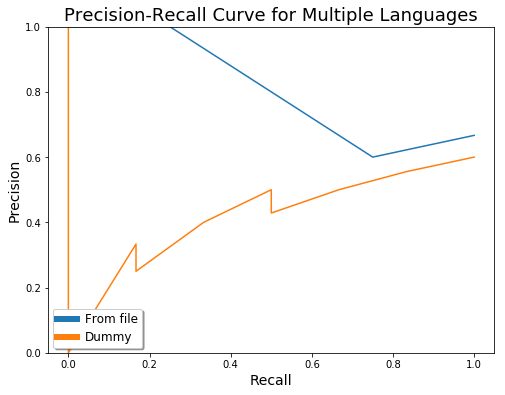

In [195]:
%matplotlib inline

fig = plt.gcf()
fig.set_size_inches(8,6)

all_series =[]
languages = set(data['language'])
for language in languages:
    language_data = data[data['language'] == language]
    
    # have to feed np.arrays into roc_curve
    truth = language_data['truth'].values[0]
    probabilities = language_data['prediction'].values[0]
    
    p, r, thresholds = sklearn.metrics.precision_recall_curve(truth, probabilities, 1)
    series, = plt.plot(r, p, label=language)
    all_series.append(series)
    
plt.title('Precision-Recall Curve for Multiple Languages', fontsize=18)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.ylim([0,1])

legend = plt.legend(all_series, languages, loc='lower left', shadow=True)
for label in legend.get_texts():
    label.set_fontsize('large')
    
for label in legend.get_lines():
    label.set_linewidth(6) #the legend line width
    
plt.show()